In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import CP_ALS3 as cp

In [4]:
%%time
init_shape = (10, 10, 10)
coo, vals, nnz = cp.coo_tensor_gen(init_shape, density=0.02)
assert cp.check_coo_tensor(coo, nnz)!= "Bad"

a, b, c, _ = cp.cp_als3(coo, vals, nnz, init_shape, rank=30, max_iter=10)
rerr = cp.sqrt_err_relative(coo, vals, nnz, init_shape, a, b, c)
print(rerr)

iterations over
0.036334077858544846
CPU times: user 15.1 ms, sys: 0 ns, total: 15.1 ms
Wall time: 15.6 ms


In [5]:
inds_list = pickle.load(open('../wikidata_tensors/fb_list.pcl', 'rb'))
ind_to_entity = pickle.load(open('../wikidata_tensors/fb_idx2ent.pcl', 'rb'))
ind_to_rel = pickle.load(open('../wikidata_tensors/fb_idx2rel.pcl', 'rb'))

In [6]:
values = [1] * len(inds_list)
values = np.array(values, dtype=np.float64)

coords = np.array(inds_list, dtype=np.int32)
nnz = len(inds_list)
data_shape = (14242, 1182, 14242)

In [29]:
max_iter=20

In [30]:
%%time
a, b, c, err_arr = cp.cp_als3(
    coords,
    values,
    nnz=nnz,
    shape=data_shape,
    rank=3000,
    max_iter=max_iter,
)

iterations over
CPU times: user 1h 17min 5s, sys: 52 s, total: 1h 17min 57s
Wall time: 42min 16s


In [31]:
rerr = cp.sqrt_err_relative(
    coords,
    values,
    nnz,
    data_shape,
    a,
    b,
    c,
)

print(f"Relative error = {rerr}")

Relative error = 294.3961571336841


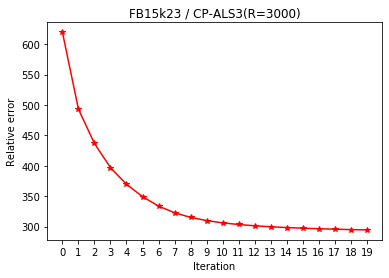

In [51]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title("FB15k23 / CP-ALS3(R=3000)")
plt.xticks(np.arange(max_iter))
plt.plot(np.arange(max_iter), err_arr[:max_iter], 'r-*')

## A couple of results:

In [ ]:
rank=3000, max_iter=20, rerr=294 1h 17min

In [ ]:
rank=2000, max_iter=10, rerr=342 25min

In [ ]:
rank=1000, max_iter=200, rerr=383 1h 50min

In [ ]:
rank=1000, max_iter=20, rerr=387

In [ ]:
rank=400, max_iter=20, rerr=460 2min